In [1]:
# Import libraries for data wrangling, preprocessing and visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
seed = 8
np.random.seed(seed)

In [2]:
url = 'D:\Programming\python\my_ai_lab\dataset\processed.cleveland.data'

data = pd.read_csv(url,sep = ',')

# data contain some ?'s; replace with NaN and drop those rows
data = data.replace('?',np.nan).dropna()

In [4]:
data['DISEASE'][data['DISEASE']>0] = 1



In [5]:
X= data.drop('DISEASE',axis=1)
Y=data['DISEASE']
print (X.shape, Y.shape, data.columns)

(297, 13) (297,) Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'DISEASE'],
      dtype='object')


In [6]:
# split data into train, test
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=39, shuffle=True)
#kipping y since value already 1 or 0
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)

# normalize data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

print (X_train.shape, y_train.shape)
print (X_train.shape, y_test.shape)
print (data.columns)

(207, 13) (207,)
(207, 13) (90,)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'DISEASE'],
      dtype='object')


In [27]:
# Define some useful callbacks
#Reduce learning rate when a metric has stopped improving.
reducelrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
# Stop training when a monitored quantity has stopped improving. 
# By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.
early_stopping_monitor=EarlyStopping(monitor='val_loss',verbose=1, patience=30, baseline=0.4, )
# Save the model after every epoch.
best_trained_model_file= 'heart_disease_predictor_kaggle.h5'
checkpoint = ModelCheckpoint(best_trained_model_file, verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  
#place callbacks want to enable on this list
callbacks=[checkpoint , reducelrp]

In [28]:
# create model with fully connected layers with dropout regulation
model = Sequential()
model.add(Dense(12, input_dim=13, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                168       
                                                                 
 dropout_6 (Dropout)         (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dropout_7 (Dropout)         (None, 6)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [29]:
%%time
# fit the model

history=model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=6,callbacks=callbacks, verbose=1)


Epoch 1/100


D:\Programming\python\my_ai_lab\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


23/23 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5145 - val_loss: 0.6930 - val_accuracy: 0.5362 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5797 - val_loss: 0.6928 - val_accuracy: 0.5362 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5797 - val_loss: 0.6926 - val_accuracy: 0.5362 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5797 - val_loss: 0.6925 - val_accuracy: 0.5362 - lr: 0.0010
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5797 - val_loss: 0.6922 - val_accuracy: 0.5362 - lr: 0.0010
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5797 - val_loss: 0.6920 - val_accuracy: 0.5362 - lr: 0.0010
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6908 - accur

Epoch 54/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.7391 - val_loss: 0.4921 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 55/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.7899 - val_loss: 0.4867 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 56/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5222 - accuracy: 0.8116 - val_loss: 0.4795 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 57/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5220 - accuracy: 0.7971 - val_loss: 0.4725 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 58/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5280 - accuracy: 0.8116 - val_loss: 0.4674 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 59/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.8188 - val_loss: 0.4632 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 60/100
23/23 [==============================] - 0s 5ms/step - lo

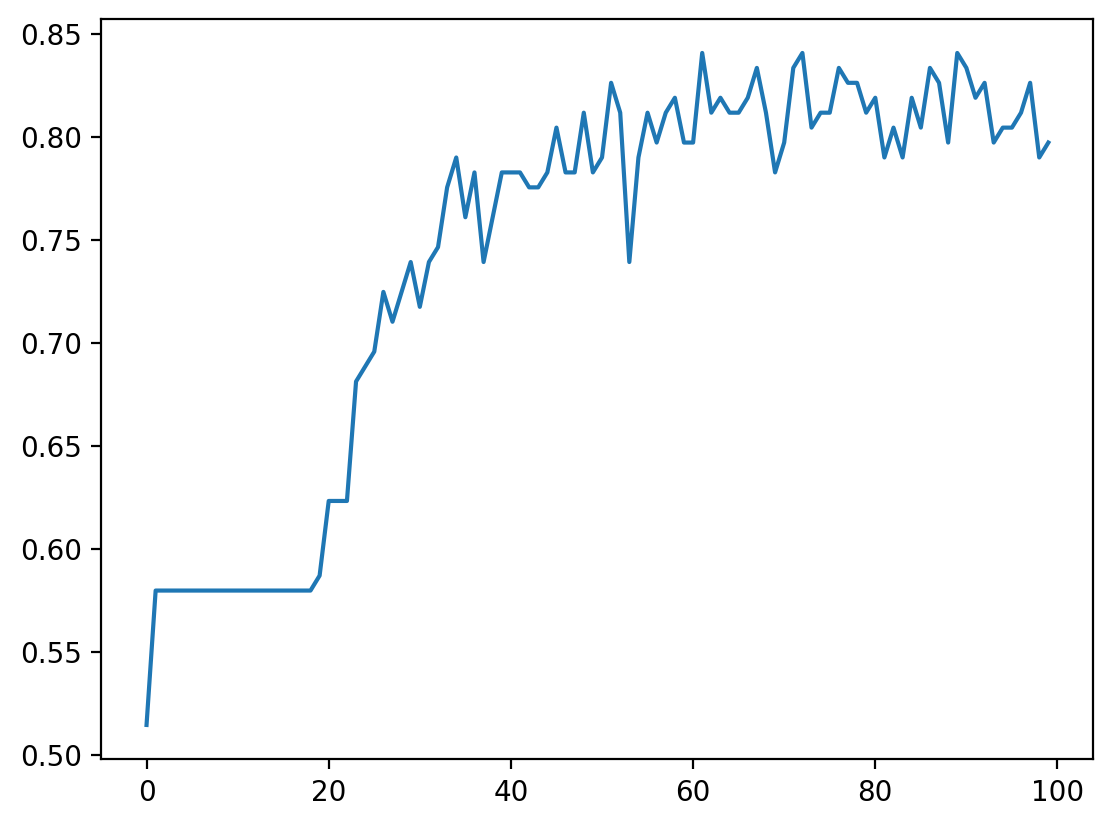

model training - finished


In [30]:
#print ("trainning model....  please wait!")

plt.plot(history.history['accuracy'])
plt.show()
print ("model training - finished")

In [26]:
print("Evaluate model against trained data")
score = model.evaluate(X_train, y_train, verbose=0)
print("score %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

print("Evaluate model against new data")
score = model.evaluate(X_test, y_test, verbose=0)
print("score %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Evaluate model against trained data
score accuracy: 85.51%
Evaluate model against new data
score accuracy: 83.33%
